In [ ]:
def f_lineal(m, b, x):
    return m * x + b


def xrecta(y):
    return np.sqrt(((2 * v0**2) / g) * (h_avion - y)) + A


## WTF


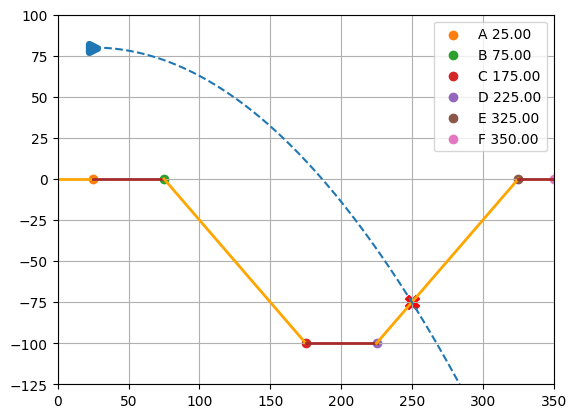

In [102]:
import matplotlib.pyplot as plt
import numpy as np

h_avion = 80
d_lanzamiento = 50
h_canion = 100
a = 45
angulo = np.radians(a)
l_canion = 50

A = 0.5 * d_lanzamiento
Xa = [0, A]
Ya = [0, 0]

b = d_lanzamiento
B = A + b
Xb = [A, B]
Yb = [0, 0]

c = h_canion / np.tan(angulo)
C = B + c
mc =np.tan(np.pi - angulo)
yc = f_lineal(mc, B * np.tan(angulo), C)
Xc = [B, C]
Yc = [0, yc]

D = C + l_canion
Xd = [C, D]
Yd = [-h_canion, -h_canion]

E = D + c
me = -mc
ye = f_lineal(me, - E * np.tan(angulo), E)
Xe = [D, E]
Ye = [-h_canion, ye]

f = A
F = E + f
Xf = [E, F]
Yf = [0, 0]


# Trayectoria
g = 9.81
v0 = 40

def trayectoria(x):
    return h_avion - (g / (2 * v0**2)) * (x - A)**2


xs = np.linspace(A, F, 100)
ys = trayectoria(xs)


plt.scatter(A, h_avion, marker='>', linewidth=5)
plt.plot(Xa, Ya, color="orange", linewidth=2)
plt.scatter(A, 0, label=f'A {A:.2f}')
plt.plot(Xb, Yb, color="brown", linewidth=2)
plt.scatter(B, 0, label=f"B {B:.2f}")
plt.plot(Xc, Yc, color="orange", linewidth=2)
plt.scatter(C, yc, label=f"C {C:.2f}")
plt.plot(Xd, Yd, color="brown", linewidth=2)
plt.scatter(D, -h_canion, label=f"D {D:.2f}")
plt.plot(Xe, Ye, color="orange", linewidth=2)
plt.scatter(E, 0, label=f"E {E:.2f}")
plt.plot(Xf, Yf, color="brown", linewidth=2)
plt.scatter(F, 0, label=f"F {F:.2f}")

plt.plot(xs, ys, linestyle='--')

plt.scatter(x1, y1,  marker='X', s=100, color='red')

plt.xlim(0, F)
plt.ylim(-1.25 * h_canion , 1.25 * h_avion)
plt.legend()
plt.grid()
plt.show()

In [69]:
-np.tan(angulo)

np.float64(-0.9999999999999999)

In [98]:
print(xrecta(-h_canion))
print(mc)


def resolver_cuadratica(a, b, c):
    discriminante = b**2 - 4 * a * c

    if discriminante < 0:
        return "No hay soluciones reales"

    raiz_discriminante = np.sqrt(discriminante)
    x1 = (-b + raiz_discriminante) / (2 * a)
    x2 = (-b - raiz_discriminante) / (2 * a)

    return (x1, x2) if x1 != x2 else (x1,)


# Ejemplo con coeficientes
a = g / (2 * v0 ** 2)
# b = mc - ((g * A) / (v0 ** 2))
# c = (g/(2 * v0 ** 2))* A ** 2 + B * np.tan(angulo) - h_avion
b = me - ((g * A) / (v0 ** 2))
c = (g/(2 * v0 ** 2))* A ** 2 - E * np.tan(angulo) - h_avion

x1, x2 = resolver_cuadratica(a, b, c)
print(x1)

# y1 = f_lineal(mc, B * np.tan(angulo), x1)
y1 = f_lineal(me, - E * np.tan(angulo), x1)
print(y1)

267.313013126153
-1.0000000000000002
249.9170900998823
-75.08290990011758


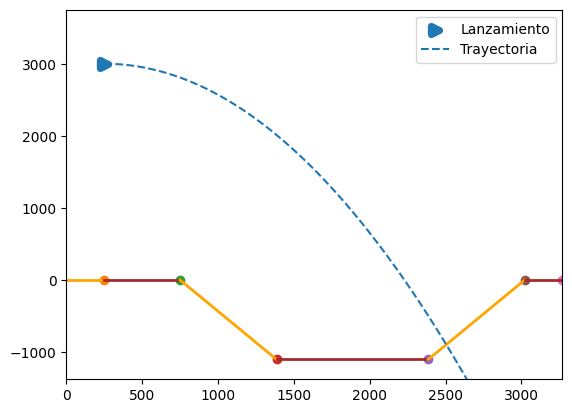

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def f_lineal(m, b, x):
    return m * x + b


# Parámetros iniciales
h_avion = 3000
h_canion = 1100
d_lanzamiento = 500
l_canion = 1000
a = np.radians(60)  # Convertimos el ángulo a radianes
g = 9.81
v0 = 80

# Puntos clave
A = 0.5 * d_lanzamiento
B = A + d_lanzamiento
C = B + h_canion / np.tan(a)
D = C + l_canion
E = D + h_canion / np.tan(a)
F = E + A

# Función de trayectoria
traj = lambda x: h_avion - (g / (2 * v0**2)) * (x - A) ** 2
xs = np.linspace(A, F, 100)
ys = traj(xs)

# Definición de segmentos
lineas = [
    ([0, A], [0, 0], "orange"),
    ([A, B], [0, 0], "brown"),
    ([B, C], [0, f_lineal(np.tan(np.pi - a), B * np.tan(a), C)], "orange"),
    ([C, D], [-h_canion, -h_canion], "brown"),
    ([D, E], [-h_canion, f_lineal(-np.tan(np.pi - a), -E * np.tan(a), E)], "orange"),
    ([E, F], [0, 0], "brown"),
]

# Graficar
plt.scatter(A, h_avion, marker=">", linewidth=5, label="Lanzamiento")
for x_vals, y_vals, color in lineas:
    plt.plot(x_vals, y_vals, color=color, linewidth=2)
    plt.scatter(x_vals[1], y_vals[1])

plt.plot(xs, ys, label="Trayectoria", linestyle="dashed")
plt.xlim(0, F)
plt.ylim(-1.25 * h_canion, 1.25 * h_avion)
plt.legend()
plt.show()